# Simple conditioning plot

In [1]:
# Import pyMC3 and also arviz for visualisation
import pymc as pm
import arviz as az
import sympy as sp
import pandas as pd
import numpy as np
import statsmodels.api as sm


#plt.rcParams["figure.facecolor"] = "None"
#plt.rcParams["savefig.facecolor"] = "None"
#plt.rcParams['image.cmap'] = 'Accent'
#plt.set_cmap('Accent')


import symseaman as ss
from symseaman.substitute_dynamic_symbols import lambdify, remove_bis_eq, run, standard_substitutes
from symseaman.seaman_symbols import *
from vct.bis_system import BisSystem
from scipy.stats import norm
from vct.regression_ols import product

[03/29/23 13:31:10] WARNING  Using NumPy C-API based implementation for BLAS functions.        ]8;id=260792;file:///home/maa/dev/PHD/venv/lib/python3.10/site-packages/pytensor/tensor/blas_headers.py\blas_headers.py]8;;\:]8;id=198454;file:///home/maa/dev/PHD/venv/lib/python3.10/site-packages/pytensor/tensor/blas_headers.py#1016\1016]8;;\

[03/29/23 13:31:11] WARNING  /home/maa/dev/PHD/venv/lib/python3.10/site-packages/bokeh/core/propert ]8;id=579122;file:///usr/lib/python3.10/warnings.py\warnings.py]8;;\:]8;id=779861;file:///usr/lib/python3.10/warnings.py#109\109]8;;\
                             y/primitive.py:37: DeprecationWarning: `np.bool8` is a deprecated                     
                             alias for `np.bool_`.  (Deprecated NumPy 1.24)                                        
                               bokeh_bool_types += (np.bool8,)                                                     
                                                                                                                   

In [16]:
import matplotlib.pyplot as plt
plt.style.use('jupyter')
plt.rcParams["figure.figsize"] = (4,1.8)
plt.rcParams["axes.labelsize"] = 12
plt.rcParams["legend.fontsize"] = 12
plt.set_cmap('jet')

<Figure size 400x180 with 0 Axes>

In [17]:
theta_prior = norm(loc=2.5, scale=0.5)
theta_likelihood = norm(loc=3.5, scale=1.0)

In [18]:
theta_posterior = product(theta_prior, theta_likelihood)

<Figure size 400x180 with 0 Axes>

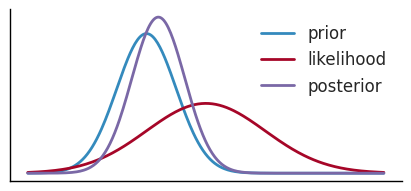

In [19]:
plt.set_cmap('jet')
rvs = [theta_prior,theta_likelihood,theta_posterior]
xmins = [rv.mean() - 3*rv.std() for rv in rvs]
xmaxs = [rv.mean() + 3*rv.std() for rv in rvs]

xmin = np.min(xmins)
xmax = np.max(xmaxs)

x_ = np.linspace(xmin, 
                 xmax, 300)

fig,ax=plt.subplots()
ax.plot(x_,theta_prior.pdf(x_), label='prior')
ax.plot(x_,theta_likelihood.pdf(x_), label='likelihood')
ax.plot(x_,theta_posterior.pdf(x_), label='posterior')

ax.legend()

ax.set_xlabel(None)
ax.set_yticks([])
ax.set_xticks([])

fig.savefig('theta.svg', transparent=True)

In [6]:
np.random.seed(42)
dx = x_[1]-x_[0]
theta_priors = theta_prior.pdf(x_)
theta_likelihoods = theta_likelihood.pdf(x_)

In [7]:
theta_posteriors= (theta_priors*theta_likelihoods)/sum(theta_priors*theta_likelihoods*dx)

Text(0.5, 0, '$\\theta$')

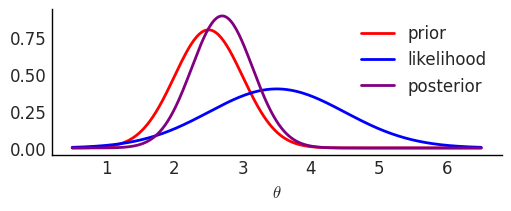

In [8]:

fig,ax=plt.subplots()
ax.plot(x_,theta_priors, color='red', label='prior')
ax.plot(x_,theta_likelihoods, color='blue', label='likelihood')
ax.plot(x_,theta_posteriors, color='purple', label='posterior')

ax.legend()
ax.set_xlabel(r'$\theta$')

In [9]:
basic_model = pm.Model()

with basic_model:
    # Priors for unknown model parameters
    theta = pm.Normal("theta", mu=theta_prior.mean(), 
                           sigma=theta_prior.std(), 
                     )
    
    sigma = pm.HalfNormal("sigma", sigma=theta_likelihood.std())


    # Likelihood (sampling distribution) of observations
    Y_obs = pm.Normal("fy_obs", mu=theta, sigma=theta_prior.std(), observed=theta_likelihoods)
    #ν = pm.Uniform("ν", 1, 10)
    #Y_obs = pm.StudentT("fy_obs", nu=ν, mu=mu, sigma=sigma, observed=y)

In [10]:
with basic_model:
    # draw 1000 posterior samples
    trace = pm.sample(draws=1000)

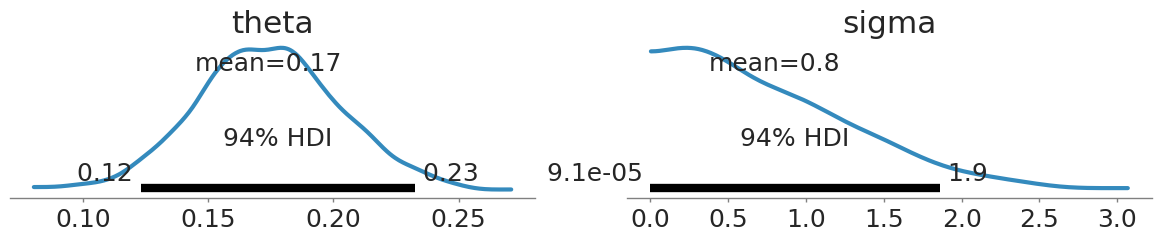

In [11]:
with basic_model:
    az.plot_posterior(trace,
                  #var_names=['theta','sigma'],
                  textsize=18,
                  point_estimate='mean',
                  rope_color='black')